# Titanic Survival Prediction

In this notebook, we will walk through the process of predicting survival on the Titanic. We'll start by loading and exploring the data, followed by data preprocessing, model training, and finally, model evaluation.

In [34]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

## Data Loading

First, let's load the data and take a quick look at what we have.

In [35]:
def load_data():
    data = pd.read_csv("tested.csv")
    return data

data = load_data()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration

Let's first understand the structure and properties of our dataset.

In [36]:
# Checking the general info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Missing Data Visualization

<Axes: >

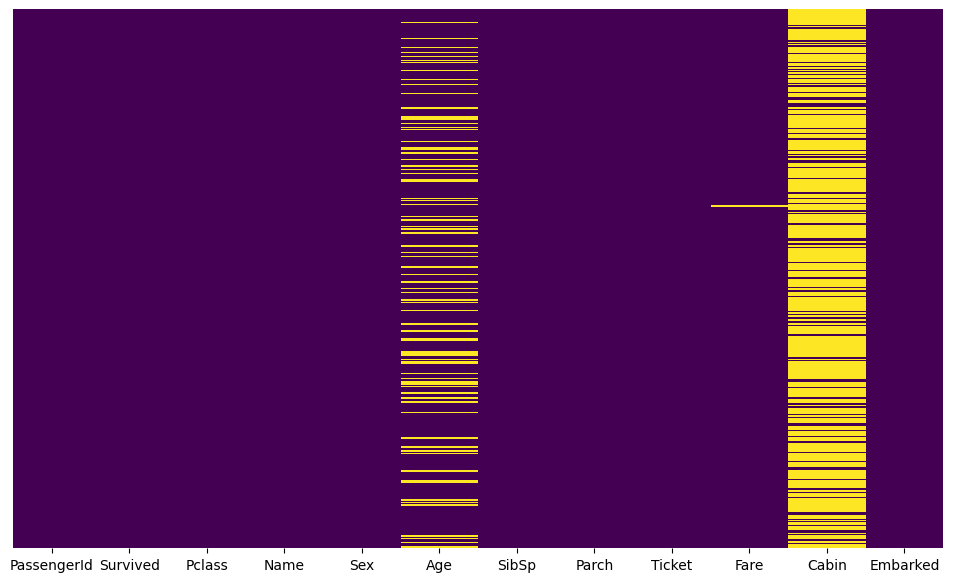

In [37]:
# Visualizing missing data
plt.figure(figsize=(12, 7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Data Distribution Visualization

<Axes: xlabel='Fare', ylabel='Count'>

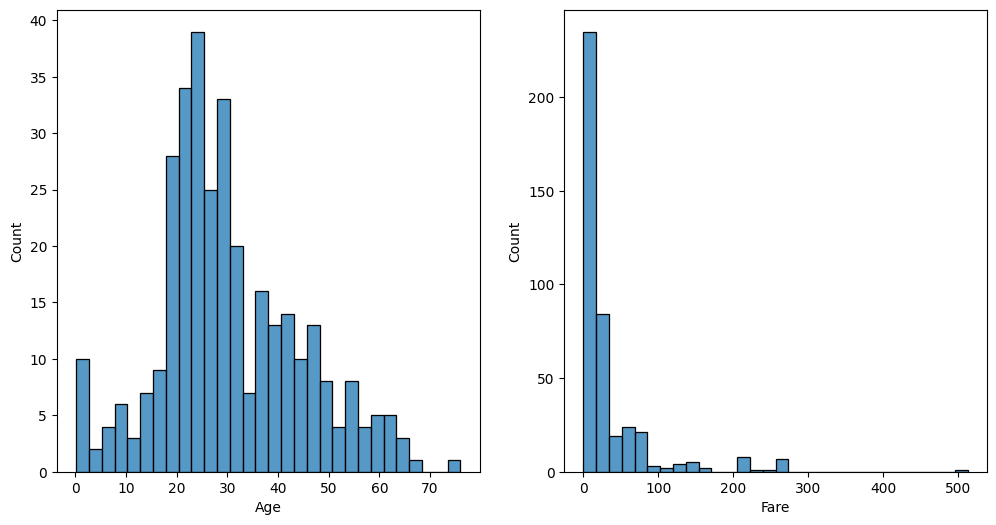

In [38]:
# Visualizing the distribution of age and fare
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data['Age'].dropna(), bins=30, ax=ax[0])
sns.histplot(data['Fare'], bins=30, ax=ax[1])

### Survival Rate Visualization

<Axes: xlabel='Survived', ylabel='count'>

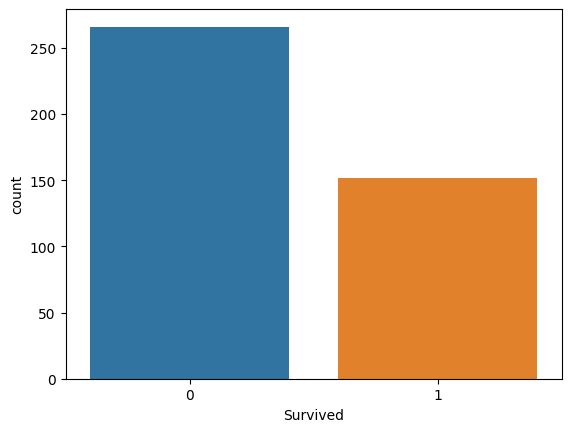

In [39]:
# Visualizing the survival rate
sns.countplot(x='Survived', data=data)

### Survival Rate by Gender

<Axes: xlabel='Survived', ylabel='count'>

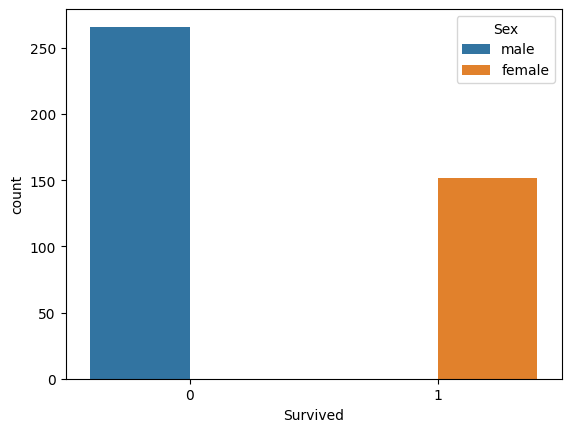

In [40]:
# Visualizing the survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=data)

### Survival Rate by Passenger Class

<Axes: xlabel='Survived', ylabel='count'>

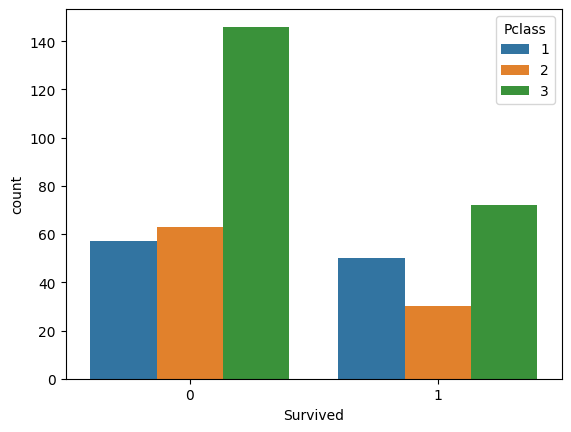

In [41]:
# Visualizing the survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=data)

## Data Preprocessing

In this section, we will clean the data by handling missing values and encoding categorical variables.

In [42]:
def preprocess_data(data):
    # Drop irrelevant features
    data = data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
    
    # Handle missing values
    data['Fare'].fillna(data['Fare'].mean(), inplace=True)
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    
    # Encode categorical variables
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
    
    return data

data = preprocess_data(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True


## Model Training

Now that our data is clean, we can proceed to train our model. We will use logistic regression for this example.

In [43]:
def train_model(X_train, y_train):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    return model, scaler

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model, scaler = train_model(X_train, y_train)

## Model Evaluation

Finally, let's evaluate the performance of our trained model using the test data.

Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



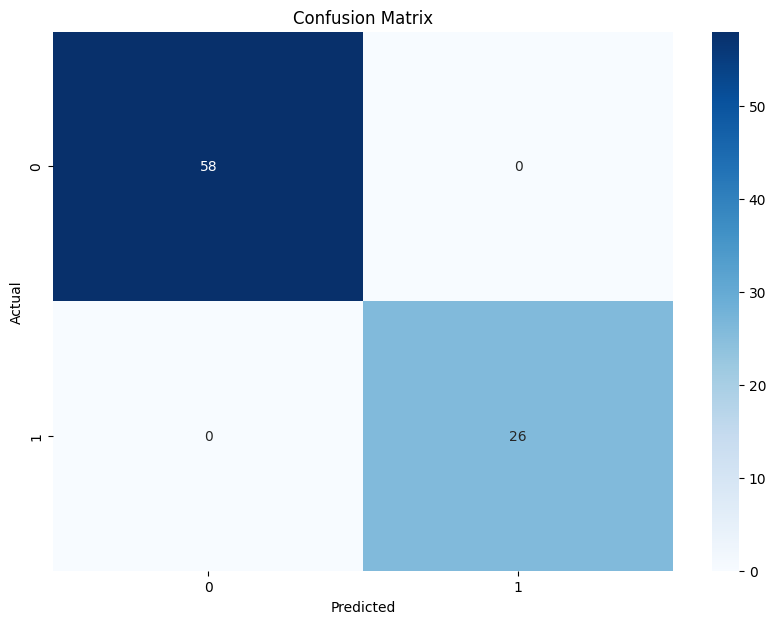

In [44]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Model Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", class_report)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()